In [10]:
import numpy as np 
import matplotlib
import pandas as pd
from __future__ import division
from scipy import interpolate
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import spectral.io.envi as envi
from spectral import *
import os
import re
import math
import PIL
from scipy import signal
from scipy import ndimage
from scipy import spatial
from scipy import stats
from scipy import interpolate
import traceback
import sys
import pickle
import warnings
from pprint import pprint
import lmfit

In [11]:
import peakutils
import matplotlib.pyplot as plt

In [12]:
headerFileAddress=r'E:\Data\ML\M3G20090720T043741_V01_RFL_test.HDR'
currentObservationHeader=envi.open(headerFileAddress)
currentObservationImage=currentObservationHeader.open_memmap()
print(dir(currentObservationHeader))
currentObservationArray=np.array(currentObservationHeader.open_memmap())
print(currentObservationArray.shape)
datacube=currentObservationArray

wavelengthList=[
  540.840027,  580.760010,  620.690002,  660.609985,  700.539978,  730.479980,
  750.440002,  770.400024,  790.369995,  810.330017,  830.289978,  850.250000,
  870.210022,  890.169983,  910.140015,  930.099976,  950.059998,  970.020020,
  989.979980, 1009.950012, 1029.910034, 1049.869995, 1069.829956, 1089.790039,
  1109.760010, 1129.719971, 1149.680054, 1169.640015, 1189.599976, 1209.569946,
  1229.530029, 1249.489990, 1269.449951, 1289.410034, 1309.380005, 1329.339966,
  1349.300049, 1369.260010, 1389.219971, 1409.189941, 1429.150024, 1449.109985,
  1469.069946, 1489.030029, 1508.989990, 1528.959961, 1548.920044, 1578.859985,
  1618.790039, 1658.709961, 1698.630005, 1738.560059, 1778.479980, 1818.400024,
  1858.329956, 1898.250000, 1938.180054, 1978.099976, 2018.020020, 2057.949951,
  2097.870117, 2137.800049, 2177.719971, 2217.639893, 2257.570068, 2297.489990,
  2337.419922, 2377.340088, 2417.260010, 2457.189941, 2497.110107, 2537.030029,
  2576.959961, 2616.879883, 2656.810059, 2696.729980, 2736.649902, 2776.580078,
  2816.500000, 2856.429932, 2896.350098, 2936.270020, 2976.199951]
wavelengthList=np.array(wavelengthList)

['__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_disable_memmap', '_fix_negative_indices', '_memmap', '_open_memmap', 'asarray', 'bands', 'byte_order', 'dtype', 'fid', 'filename', 'interleave', 'load', 'metadata', 'nbands', 'ncols', 'nrows', 'offset', 'open_memmap', 'params', 'read_band', 'read_bands', 'read_datum', 'read_pixel', 'read_subimage', 'read_subregion', 'sample_size', 'scale_factor', 'set_params', 'shape', 'swap', 'transform', 'using_memmap']
(2501, 304, 83)


In [13]:
datacube=ndimage.uniform_filter(datacube,size=3)

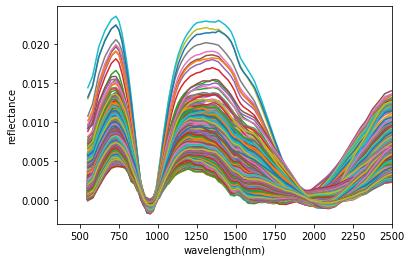

In [14]:
base=[]
for i in range(1,1000):
   # plt.plot(wavelengthList,datacube[3,56,:])
    plt.xlim(350,2500)
#x8=df_pl.iloc[:,0].to_numpy()
    baseline_peakutils = peakutils.baseline(datacube[i,56,:])
    intensity_peakutils = datacube[i,56,:] - baseline_peakutils
    f =(interp1d(wavelengthList, intensity_peakutils))
    inter=np.arange(550,2505,5)
    final=f(np.array(inter))
    plt.plot(inter,final)
    base.append(final)
plt.xlabel("wavelength(nm)")
plt.ylabel("reflectance")
plt.show()

In [15]:
final=np.array(base)
final.shape

(999, 391)

In [7]:
from scipy.interpolate import interp1d
f = interp1d(wavelengthList, intensity_peakutils)

In [16]:
len(inter)

391

In [18]:


# This function take a dataframe
# as a parameter and returning list
# of column names whose contents 
# are duplicates.
def getDuplicateColumns(df):
  
    # Create an empty set
    duplicateColumnNames = set()
      
    # Iterate through all the columns 
    # of dataframe
    for x in range(df.shape[1]):
          
        # Take column at xth index.
        col = df.iloc[:, x]
          
        # Iterate through all the columns in
        # DataFrame from (x + 1)th index to
        # last index
        for y in range(x + 1, df.shape[1]):
              
            # Take column at yth index.
            otherCol = df.iloc[:, y]
              
            # Check if two columns at x & y
            # index are equal or not,
            # if equal then adding 
            # to the set
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                  
    # Return list of unique column names 
    # whose contents are duplicates.
    return list(duplicateColumnNames)

In [19]:
df=pd.read_excel("15_Master_Mixtures_Part_1.xlsx",header=[3])
df=df[df['Wavelength (nm)'] % 5==0]
df.dropna(how='all', axis=1, inplace=True)

duplicateColNames = getDuplicateColumns(df)
  
print('Duplicate Columns are :')
for column in duplicateColNames :
    print('Column Name : ', column)
    print(df.columns.get_loc(column))    
df.drop(df.columns[[42, 30,54,15 ]], axis = 1, inplace = True)
#df.drop(df.columns[[54 ]], axis = 1, inplace = True)
duplicateColNames = getDuplicateColumns(df)
  
print('Duplicate Columns are :')
for column in duplicateColNames :
    print('Column Name : ', column)
index_name = df[ df['Wavelength (nm)'] <550 ].index
df.drop(index_name, inplace = True)
print(df)

Duplicate Columns are :
Column Name :  dec1406.013.1
43
Column Name :  dec1406.016.1
46
Column Name :  Wavelength
15
Column Name :  Wavelength (nm).1
30
Column Name :  dec1406.015.1
45
Column Name :  dec1406.021.1
51
Column Name :  dec1406.018.1
48
Column Name :  dec1406.017.1
47
Column Name :  Wavelength (nm).3
54
Column Name :  dec1406.019.1
49
Column Name :  dec1406.023.1
53
Column Name :  Wavelength (nm).2
42
Column Name :  dec1406.022.1
52
Column Name :  dec1406.020.1
50
Column Name :  dec1406.014.1
44
Duplicate Columns are :
Column Name :  dec1406.013.1
Column Name :  dec1406.015.1
Column Name :  dec1406.021.1
Column Name :  dec1406.018.1
Column Name :  dec1406.017.1
Column Name :  dec1406.019.1
Column Name :  dec1406.023.1
Column Name :  dec1406.022.1
Column Name :  dec1406.020.1
Column Name :  dec1406.014.1
Column Name :  dec1406.016.1
      Wavelength (nm)  sep0407.001  sep0407.002  sep0407.003  sep0407.004  \
200             550.0     0.518902     0.509121     0.508915     0.

In [20]:
df1=pd.read_excel("orthopyroxene.xlsx",header=[2],usecols = "A:S")
df1.dropna(how='all', axis=1, inplace=True)
df1=df1[df1['Sample ID'] % 5==0]
index_name = df1[ df1['Sample ID'] <550 ].index
df1.drop(index_name, inplace = True)
print(df1)

      Sample ID    PYX003  PYX003.1    PYX023  PYX023.1    PYX032  PYX032.1  \
200       550.0  0.250643  0.147692  0.492883  0.323050  0.202696  0.123732   
205       555.0  0.252926  0.149176  0.494576  0.325177  0.205125  0.125352   
210       560.0  0.255258  0.150684  0.496135  0.327043  0.207431  0.126885   
215       565.0  0.257364  0.152067  0.497038  0.328028  0.209416  0.128119   
220       570.0  0.259418  0.153360  0.497616  0.328397  0.211158  0.129195   
...         ...       ...       ...       ...       ...       ...       ...   
2130     2480.0  0.484076  0.380070  0.495032  0.349714  0.285508  0.238969   
2135     2485.0  0.485441  0.380944  0.494315  0.349372  0.285671  0.240008   
2140     2490.0  0.485872  0.381656  0.493389  0.348601  0.286378  0.241476   
2145     2495.0  0.487431  0.383167  0.493673  0.347348  0.287236  0.243293   
2150     2500.0  0.488089  0.383652  0.493709  0.347179  0.288217  0.243740   

        PYX042  PYX042.1    PYX108  PYX108.1    PYX

In [21]:
df2=pd.read_excel("2_2_Master_Olivines.xlsx",header=[3],usecols = "A,C:S")
df2.dropna(how='all',axis=1,inplace=True)
index_names = df2[ df2['wavelength (nm)'] > 2500 ].index
df2.drop(index_names, inplace = True)
print(df2)
index_name = df2[ df2['wavelength (nm)'] <550 ].index
df2.drop(index_name, inplace = True)
print(df2)

     wavelength (nm)    OLV002  OLV002.1    OLV003  OLV003.1  OLV003.2  \
0              300.0  0.141179  0.068696  0.225242  0.082596  0.247412   
1              305.0  0.150881  0.071555  0.236697  0.085956  0.251261   
2              310.0  0.157884  0.075518  0.252683  0.093252  0.264559   
3              315.0  0.173051  0.080394  0.271370  0.103220  0.279718   
4              320.0  0.188458  0.089754  0.297143  0.115948  0.302189   
..               ...       ...       ...       ...       ...       ...   
436           2480.0  0.747488  0.778521  0.791292  0.761921  0.696385   
437           2485.0  0.747556  0.778615  0.791516  0.760329  0.694771   
438           2490.0  0.747877  0.779214  0.792605  0.760035  0.694832   
439           2495.0  0.748427  0.780564  0.792060  0.758931  0.694031   
440           2500.0  0.748935  0.780635  0.792420  0.759391  0.694564   

       OLV005  OLV005.1    OLV007    OLV008    OLV009  OLV009.1    OLV010  \
0    0.232673  0.118157  0.337626 

In [22]:
df4 = pd.read_excel("15_Master_Mixtures_Part_1.xlsx", sheet_name="15_2_Mixtures",header=[3],usecols = "A:L")
df4=df4[df4['Sample ID'] % 5==0]
index_name_p1 = df4[ df4['Sample ID'] <550 ].index
df4.drop(index_name_p1, inplace = True)
print(df4)

      Sample ID  pomix1001  pomix1002  pomix1003  pomix1004  pomix1005  \
200       550.0   0.600311   0.591994   0.590859   0.586653   0.572985   
205       555.0   0.602387   0.594216   0.593305   0.589332   0.575879   
210       560.0   0.603824   0.595930   0.595259   0.591760   0.578704   
215       565.0   0.604761   0.597079   0.596673   0.593295   0.580480   
220       570.0   0.605887   0.598289   0.597984   0.594778   0.582069   
...         ...        ...        ...        ...        ...        ...   
2130     2480.0   0.622465   0.611169   0.609519   0.602812   0.583693   
2135     2485.0   0.622840   0.612001   0.610763   0.604860   0.584018   
2140     2490.0   0.623309   0.612653   0.611479   0.605496   0.584183   
2145     2495.0   0.624294   0.612794   0.611911   0.605801   0.585602   
2150     2500.0   0.625140   0.613496   0.612801   0.607113   0.586328   

      pomix1006  pomix1007  pomix1008  pomix1009  pomix1010  pomix1011  
200    0.562956   0.544941   0.536644 

In [23]:
dfp=pd.read_excel("Plagioclase.xlsx",header=[1])
dfp=dfp[dfp['Wavelength (nm)']%5==0]
index_names_p = dfp[ dfp['Wavelength (nm)'] > 2500 ].index
dfp.drop(index_names_p, inplace = True)
index_name_p1 = dfp[ dfp['Wavelength (nm)'] <550 ].index
dfp.drop(index_name_p1, inplace = True)
print(dfp)

     Wavelength (nm)    capl29    capl30    capl31    capl32    capl33  \
50               550  0.626842  0.666343  0.768891  0.706051  0.777704   
51               555  0.626510  0.666667  0.769286  0.706947  0.779176   
52               560  0.628544  0.668753  0.769675  0.707543  0.778465   
53               565  0.628772  0.669064  0.769869  0.708584  0.780090   
54               570  0.630270  0.671085  0.770363  0.708544  0.780110   
..               ...       ...       ...       ...       ...       ...   
436             2480  0.630297  0.725125  0.772524  0.717199  0.753267   
437             2485  0.627961  0.723411  0.773030  0.715095  0.753580   
438             2490  0.627254  0.725084  0.773313  0.715958  0.755770   
439             2495  0.626199  0.725739  0.773655  0.714517  0.753480   
440             2500  0.623866  0.725477  0.772810  0.712855  0.753137   

       capl34    capl35    capl36    capl37  ...    capl44    capl45  \
50   0.770815  0.423558  0.700319  0.51

In [24]:
dfl=pd.read_excel("ilmenite.xlsx",header=[1])
dfl=dfl[dfl['Sample ID']%5==0]
index_names_l = dfl[ dfl['Sample ID'] > 2500 ].index
dfl.drop(index_names_l, inplace = True)
index_name_l = dfl[ dfl['Sample ID'] <550 ].index
dfl.drop(index_name_l, inplace = True)
print(dfl)

      Sample ID    ILM102  ILM102.1  ILM102.2  ILM102.3  ILM102.4  ILM102.5  \
200         550  0.056610  0.055326  0.055968  0.072556  0.070803  0.071680   
205         555  0.056636  0.055330  0.055983  0.072641  0.070884  0.071763   
210         560  0.056699  0.055398  0.056048  0.072737  0.070993  0.071865   
215         565  0.056700  0.055403  0.056051  0.072787  0.071050  0.071919   
220         570  0.056722  0.055407  0.056065  0.072858  0.071113  0.071985   
...         ...       ...       ...       ...       ...       ...       ...   
2130       2480  0.070545  0.069159  0.069852  0.075049  0.073599  0.074324   
2135       2485  0.070341  0.068988  0.069665  0.075172  0.073369  0.074271   
2140       2490  0.070949  0.069347  0.070148  0.074149  0.073135  0.073642   
2145       2495  0.071321  0.069853  0.070587  0.074975  0.073280  0.074128   
2150       2500  0.070948  0.069445  0.070196  0.075657  0.073583  0.074620   

      ILM102.6  ILM102.7  ILM102.8  ...    ILM153  

In [25]:
df_sp=pd.read_excel("Spinels.xlsx",header=[0])
df_sp=df_sp[df_sp['Sample ID']%5==0]
index_names_sp = df_sp[ df_sp['Sample ID'] > 2500 ].index
df_sp.drop(index_names_sp, inplace = True)
index_name_sp = df_sp[ df_sp['Sample ID'] <550 ].index
df_sp.drop(index_name_sp, inplace = True)
print(df_sp)

     Sample ID    HER101    SPI112    SPI114    SPI115    SPI116    SPI117  \
50         550  0.088000  0.058700  0.089028  0.189884  0.571737  0.636783   
51         555  0.088256  0.058929  0.088863  0.189055  0.571362  0.638764   
52         560  0.088630  0.059253  0.089167  0.188937  0.564103  0.646291   
53         565  0.088950  0.059214  0.089353  0.188806  0.557176  0.653476   
54         570  0.088971  0.059357  0.089430  0.188848  0.549602  0.661446   
..         ...       ...       ...       ...       ...       ...       ...   
436       2480  0.118822  0.060136  0.100650  0.172788  0.310307  0.169887   
437       2485  0.118850  0.059983  0.100759  0.172926  0.310534  0.169941   
438       2490  0.119190  0.060318  0.100663  0.173024  0.309824  0.169809   
439       2495  0.119076  0.060352  0.101078  0.173121  0.309785  0.169659   
440       2500  0.119660  0.060361  0.100905  0.173453  0.310284  0.169623   

       SPI118    SPI119    SPI121  ...  SPI118.1  SPI119.1  SPI

In [26]:
dfol_m=pd.read_excel("cers89.xlsx",header=[1])
# df_sp=df_sp[df_sp['Wavelength']%5==0]

index_names_m1 = dfol_m[ dfol_m['Wavelength(micron)'] > 2.500 ].index
dfol_m.drop(index_names_m1, inplace = True)
index_name_m1 = dfol_m[ dfol_m['Wavelength(micron)'] <0.550 ].index
dfol_m.drop(index_name_m1, inplace = True)
print(dfol_m)

     Wavelength(micron)  Reflectance  Reflectance.1  Reflectance.2  \
50                0.550      0.06986        0.06698        0.06442   
51                0.555      0.07117        0.06776        0.06557   
52                0.560      0.07209        0.06831        0.06623   
53                0.565      0.07263        0.06864        0.06655   
54                0.570      0.07317        0.06899        0.06703   
..                  ...          ...            ...            ...   
436               2.480      0.15915        0.11395        0.16390   
437               2.485      0.15870        0.11368        0.16385   
438               2.490      0.15874        0.11368        0.16356   
439               2.495      0.15809        0.11351        0.16302   
440               2.500      0.15795        0.11344        0.16284   

     Reflectance.3  Reflectance.4  
50         0.05440        0.06103  
51         0.05499        0.06178  
52         0.05535        0.06216  
53         0.05

In [27]:
df2_m=pd.read_excel("c1xs06.xlsx",header=[1])
# df_sp=df_sp[df_sp['Wavelength']%5==0]

index_names_m2 = df2_m[ df2_m['Wavelength(micron)'] > 2.500 ].index
df2_m.drop(index_names_m2, inplace = True)
index_name_m2 = df2_m[ df2_m['Wavelength(micron)'] <0.550 ].index
df2_m.drop(index_name_m2, inplace = True)
print(df2_m)

     Wavelength(micron)  Reflectance  Reflectance.1  Reflectance.2  \
50                0.550      0.22885        0.37800        0.44387   
51                0.555      0.23033        0.37792        0.44617   
52                0.560      0.23184        0.37987        0.44731   
53                0.565      0.23155        0.38139        0.44891   
54                0.570      0.23092        0.38302        0.44937   
..                  ...          ...            ...            ...   
436               2.480      0.32621        0.44452        0.51550   
437               2.485      0.32672        0.44555        0.51687   
438               2.490      0.32778        0.44672        0.51746   
439               2.495      0.32862        0.44722        0.51853   
440               2.500      0.32933        0.44821        0.51977   

     Reflectance.3  Reflectance.4  Reflectance.5  Reflectance.6  \
50         0.19224        0.30296        0.42301        0.15848   
51         0.19310       

In [28]:
df3_m=pd.read_excel("c1xs15.xlsx",header=[1])
# df_sp=df_sp[df_sp['Wavelength']%5==0]

index_names_m3 = df3_m[ df3_m['Wavelength(micron)'] > 2.500 ].index
df3_m.drop(index_names_m3, inplace = True)
index_name_m3 = df3_m[ df3_m['Wavelength(micron)'] <0.550 ].index
df3_m.drop(index_name_m3, inplace = True)
print(df3_m)

     Wavelength(micron)  Reflectance  Reflectance.1  Reflectance.2
50                0.550      0.33910        0.36936        0.27982
51                0.555      0.33982        0.36975        0.28098
52                0.560      0.34046        0.37073        0.28119
53                0.565      0.34104        0.37149        0.28127
54                0.570      0.34161        0.37097        0.28215
..                  ...          ...            ...            ...
436               2.480      0.42374        0.41890        0.35029
437               2.485      0.42472        0.41910        0.35043
438               2.490      0.42461        0.41920        0.35133
439               2.495      0.42604        0.41980        0.35169
440               2.500      0.42689        0.41997        0.35250

[391 rows x 4 columns]


In [29]:
df4_m=pd.read_excel("c1xt47.xlsx",header=[1])
# df_sp=df_sp[df_sp['Wavelength']%5==0]

index_names_m4 = df4_m[ df4_m['Wavelength(micron)'] > 2.500 ].index
df4_m.drop(index_names_m4, inplace = True)
index_name_m4 = df4_m[ df4_m['Wavelength(micron)'] <0.550 ].index
df4_m.drop(index_name_m4, inplace = True)
print(df4_m)

     Wavelength(micron)  Reflectance  Reflectance.1  Reflectance.2  \
50                0.550      0.68771        0.73981        0.77684   
51                0.555      0.69040        0.74027        0.77841   
52                0.560      0.69184        0.74230        0.77995   
53                0.565      0.69501        0.74497        0.78132   
54                0.570      0.69617        0.74505        0.78150   
..                  ...          ...            ...            ...   
436               2.480      0.74304        0.78778        0.76894   
437               2.485      0.74272        0.78718        0.76945   
438               2.490      0.74301        0.78649        0.76689   
439               2.495      0.74337        0.78563        0.76673   
440               2.500      0.74455        0.78684        0.76686   

     Reflectance.3  Reflectance.4  Reflectance.5  Reflectance.6  
50         0.73573        0.76399        0.73333        0.71267  
51         0.73725        0

In [30]:
df5_m=pd.read_excel("c1xt57.xlsx",header=[1])
# df_sp=df_sp[df_sp['Wavelength']%5==0]
df5_m = df5_m.dropna()

index_names_m5 = df5_m[ df5_m['Wavelength(micron)'] > 2.500 ].index
df5_m.drop(index_names_m5, inplace = True)
index_name_m5 = df5_m[ df5_m['Wavelength(micron)'] <0.550 ].index
df5_m.drop(index_name_m5, inplace = True)
print(df5_m)

     Wavelength(micron)  Reflectance  Reflectance.1  Reflectance.2  \
50                0.550      0.46188        0.46188        0.48294   
51                0.555      0.46355        0.46355        0.48631   
52                0.560      0.46701        0.46701        0.48901   
53                0.565      0.46594        0.46594        0.49123   
54                0.570      0.47085        0.47085        0.49311   
..                  ...          ...            ...            ...   
436               2.480      0.53975        0.53975        0.54641   
437               2.485      0.53998        0.53998        0.54720   
438               2.490      0.54065        0.54065        0.54768   
439               2.495      0.54078        0.54078        0.54775   
440               2.500      0.54009        0.54009        0.54854   

     Reflectance.3  
50         0.49505  
51         0.49796  
52         0.50060  
53         0.50315  
54         0.50478  
..             ...  
436        0

In [31]:
df_pl=pd.read_excel("relab_plag.xlsx",header=[1])

index_names_m_pl = df_pl[ df_pl['Wavelength(micron)'] > 2.500].index
df_pl.drop(index_names_m_pl, inplace = True)
index_name_m_pl = df_pl[ df_pl['Wavelength(micron)'] <0.550 ].index
df_pl.drop(index_name_m_pl, inplace = True)
#df_pl=df_pl[(df_pl['Wavelength(micron)']*1000)%5==0]
#df_pl = df_pl.dropna()
print(df_pl)

     Wavelength(micron)  Reflectance  Reflectance.1  Reflectance.2  \
35                0.550      0.48777        0.74160        0.70158   
36                0.555      0.48964        0.74303        0.70257   
37                0.560      0.49199        0.74353        0.70352   
38                0.565      0.49404        0.74469        0.70460   
39                0.570      0.49537        0.74628        0.70587   
..                  ...          ...            ...            ...   
421               2.480      0.58753        0.75618        0.71025   
422               2.485      0.58788        0.75598        0.70854   
423               2.490      0.58813        0.75402        0.70702   
424               2.495      0.58921        0.75653        0.70915   
425               2.500      0.58920        0.75286        0.70545   

     Reflectance.3  Reflectance.4  Reflectance.5  Reflectance.6  Reflectance.7  
35         0.77923        0.65361        0.24673        0.71808        0.27850

In [32]:
feature=[]


56


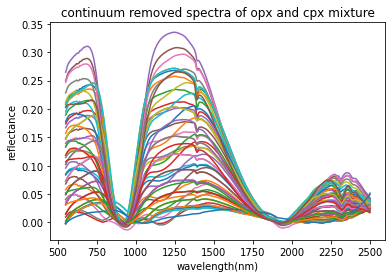

In [33]:
x=df.iloc[:,0].to_numpy()

for j in range(1,len(df.columns)):
    y=df.iloc[:,j].to_numpy()
    baseline_peakutils = peakutils.baseline(y)
    intensity_peakutils = y - baseline_peakutils
    plt.plot(x,intensity_peakutils)
    plt.xlabel("wavelength(nm)")
    plt.ylabel("reflectance")
    plt.title("continuum removed spectra of opx and cpx mixture")
    feature.append(intensity_peakutils)
print(len(feature))

74


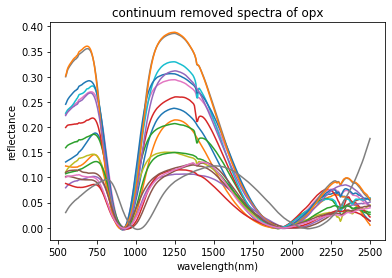

In [34]:
x1=df.iloc[:,0].to_numpy()

for i in range(1,len(df1.columns)):
    y=df1.iloc[:,i].to_numpy()
    
    baseline_peakutils = peakutils.baseline(y)
    intensity_peakutils = y - baseline_peakutils
    plt.plot(x,intensity_peakutils)
    plt.xlabel("wavelength(nm)")
    plt.ylabel("reflectance")
    plt.title("continuum removed spectra of opx")
    feature.append(intensity_peakutils)
print(len(feature))

91


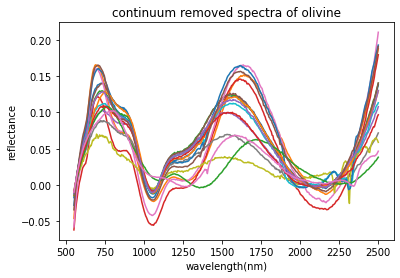

In [35]:
x2=df2.iloc[:,0].to_numpy()
for k in range(1,len(df2.columns)):
    y=df2.iloc[:,k].to_numpy()

    baseline_peakutils = peakutils.baseline(y)
    intensity_peakutils = y - baseline_peakutils
    plt.plot(x2,intensity_peakutils)
    plt.xlabel("wavelength(nm)")
    plt.ylabel("reflectance")
    plt.title("continuum removed spectra of olivine")
    feature.append(intensity_peakutils)
print(len(feature))

102


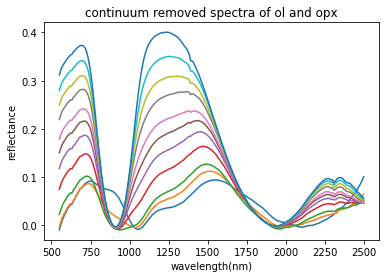

In [36]:
x4=df4.iloc[:,0].to_numpy()
for r in range(1,len(df4.columns)):
    y=df4.iloc[:,r].to_numpy()

    baseline_peakutils = peakutils.baseline(y)
    intensity_peakutils = y - baseline_peakutils
    plt.plot(x4,intensity_peakutils)
    plt.xlabel("wavelength(nm)")
    plt.ylabel("reflectance")
    plt.title("continuum removed spectra of ol and opx")
    feature.append(intensity_peakutils)
print(len(feature))

127


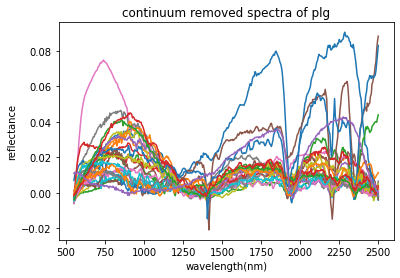

In [37]:
x5=dfp.iloc[:,0].to_numpy()
for r in range(1,len(dfp.columns)):
    y=dfp.iloc[:,r].to_numpy()

    baseline_peakutils = peakutils.baseline(y)
    intensity_peakutils = y - baseline_peakutils
    plt.plot(x5,intensity_peakutils)
    plt.xlabel("wavelength(nm)")
    plt.ylabel("reflectance")
    plt.title("continuum removed spectra of plg")
    feature.append(intensity_peakutils)
print(len(feature))

159


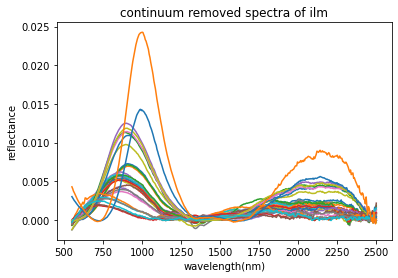

In [38]:
x6=dfl.iloc[:,0].to_numpy()
for r in range(1,len(dfl.columns)):
    y=dfl.iloc[:,r].to_numpy()

    baseline_peakutils = peakutils.baseline(y)
    intensity_peakutils = y - baseline_peakutils
    plt.plot(x4,intensity_peakutils)
    plt.xlabel("wavelength(nm)")
    plt.ylabel("reflectance")
    plt.title("continuum removed spectra of ilm")
    feature.append(intensity_peakutils)
print(len(feature))

192


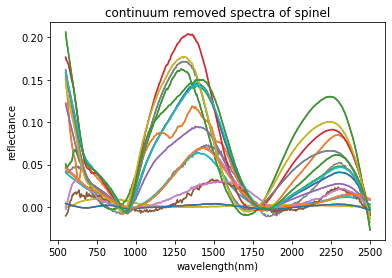

In [39]:
x7=df_sp.iloc[:,0].to_numpy()
for r in range(1,len(df_sp.columns)):
    y=df_sp.iloc[:,r].to_numpy()

    baseline_peakutils = peakutils.baseline(y)
    intensity_peakutils = y - baseline_peakutils
    plt.plot(x4,intensity_peakutils)
    plt.xlabel("wavelength(nm)")
    plt.ylabel("reflectance")
    plt.title("continuum removed spectra of spinel")
    feature.append(intensity_peakutils)
print(len(feature))

197


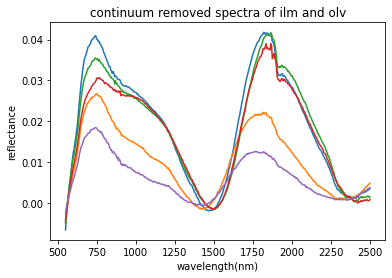

In [40]:
x8=df.iloc[:,0].to_numpy()
for r in range(1,len(dfol_m.columns)):
    y=dfol_m.iloc[:,r].to_numpy()

    baseline_peakutils = peakutils.baseline(y)
    intensity_peakutils = y - baseline_peakutils
    plt.plot(x8,intensity_peakutils)
    plt.xlabel("wavelength(nm)")
    plt.ylabel("reflectance")
    plt.title("continuum removed spectra of ilm and olv")
    feature.append(intensity_peakutils)
print(len(feature))

207


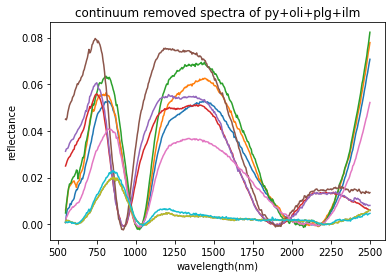

In [41]:
x8=df.iloc[:,0].to_numpy()
for r in range(1,len(df2_m.columns)):
    y=df2_m.iloc[:,r].to_numpy()

    baseline_peakutils = peakutils.baseline(y)
    intensity_peakutils = y - baseline_peakutils
    plt.plot(x8,intensity_peakutils)
    plt.xlabel("wavelength(nm)")
    plt.ylabel("reflectance")
    plt.title("continuum removed spectra of py+oli+plg+ilm")
    feature.append(intensity_peakutils)
print(len(feature))

207


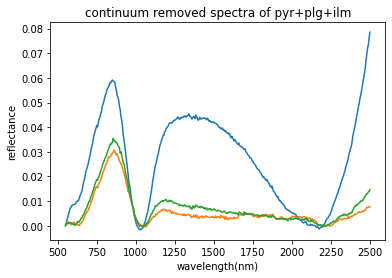

In [42]:
x8=df.iloc[:,0].to_numpy()
for r in range(1,len(df3_m.columns)):
    y=df3_m.iloc[:,r].to_numpy()

    baseline_peakutils = peakutils.baseline(y)
    intensity_peakutils = y - baseline_peakutils
    plt.plot(x8,intensity_peakutils)
    plt.xlabel("wavelength(nm)")
    plt.ylabel("reflectance")
    plt.title("continuum removed spectra of pyr+plg+ilm")
    #feature.append(intensity_peakutils)
print(len(feature))

214


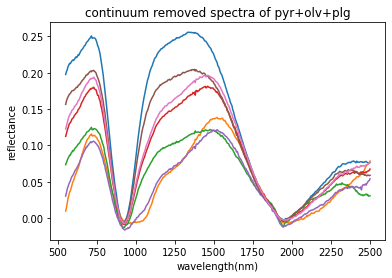

In [43]:
x8=df.iloc[:,0].to_numpy()
for r in range(1,len(df4_m.columns)):
    y=df4_m.iloc[:,r].to_numpy()

    baseline_peakutils = peakutils.baseline(y)
    intensity_peakutils = y - baseline_peakutils
    plt.plot(x8,intensity_peakutils)
    plt.xlabel("wavelength(nm)")
    plt.ylabel("reflectance")
    plt.title("continuum removed spectra of pyr+olv+plg")
    feature.append(intensity_peakutils)
print(len(feature))

218


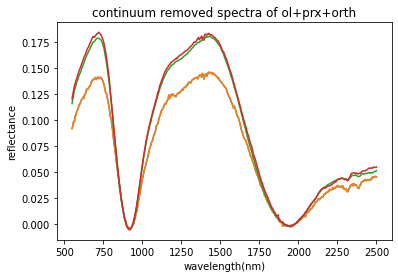

In [44]:
x8=df.iloc[:,0].to_numpy()
for r in range(1,len(df5_m.columns)):
    y=df5_m.iloc[:,r].to_numpy()

    baseline_peakutils = peakutils.baseline(y)
    intensity_peakutils = y - baseline_peakutils
    plt.plot(x8,intensity_peakutils)
    plt.xlabel("wavelength(nm)")
    plt.ylabel("reflectance")
    plt.title("continuum removed spectra of ol+prx+orth")
    feature.append(intensity_peakutils)
print(len(feature))

226


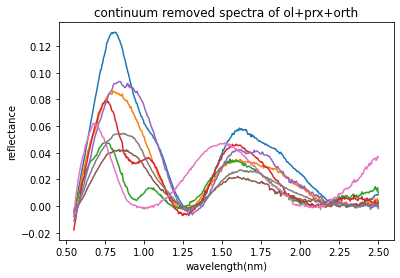

In [45]:
x8=df_pl.iloc[:,0].to_numpy()
for r in range(1,len(df_pl.columns)):
    y=df_pl.iloc[:,r].to_numpy()

    baseline_peakutils = peakutils.baseline(y)
    intensity_peakutils = y - baseline_peakutils
    plt.plot(x8,intensity_peakutils)
    plt.xlabel("wavelength(nm)")
    plt.ylabel("reflectance")
    plt.title("continuum removed spectra of ol+prx+orth")
    feature.append(intensity_peakutils)
print(len(feature))

In [46]:
np.array(feature).shape

(226, 391)

In [47]:
# feature.append(final)
# np.array(final).shape
# print(len(feature))
final.shape
for i in range(len(final)):
    feature.append(final[i])
print(len(feature))

1225


In [48]:
x=df.iloc[:,0].to_numpy()

df_f = pd.DataFrame(np.asarray(feature),columns=x)
df_f

,550.0,555.0,560.0,565.0,570.0,575.0,580.0,585.0,590.0,595.0,...,2455.0,2460.0,2465.0,2470.0,2475.0,2480.0,2485.0,2490.0,2495.0,2500.0
0,0.210809,0.213762,0.216804,0.218937,0.221111,0.222663,0.224067,0.225164,0.226289,0.227264,...,0.046203,0.045714,0.045115,0.044866,0.044824,0.044574,0.043995,0.044071,0.042343,0.042251
1,0.205145,0.208173,0.211109,0.213353,0.215478,0.217091,0.218390,0.219522,0.220523,0.221536,...,0.044818,0.043804,0.043279,0.043154,0.043229,0.042674,0.041811,0.041504,0.040734,0.040408
2,0.189342,0.192103,0.194874,0.196897,0.198965,0.200357,0.201571,0.202512,0.203460,0.204323,...,0.041062,0.039994,0.039496,0.039516,0.039257,0.039727,0.039223,0.038278,0.038248,0.037629
3,0.173917,0.176568,0.179235,0.181159,0.183126,0.184482,0.185590,0.186536,0.187456,0.188265,...,0.038720,0.038148,0.038512,0.038613,0.039271,0.039184,0.038235,0.038483,0.037532,0.038171
4,0.166841,0.169528,0.172112,0.174013,0.175925,0.177293,0.178375,0.179256,0.180046,0.180858,...,0.037959,0.037326,0.037411,0.037556,0.037953,0.037604,0.037482,0.037333,0.036420,0.036556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,0.001863,0.001940,0.002017,0.002095,0.002172,0.002249,0.002326,0.002552,0.002804,0.003057,...,0.003235,0.003291,0.003324,0.003356,0.003389,0.003421,0.003454,0.003486,0.003519,0.003530
1221,0.001985,0.002064,0.002143,0.002222,0.002301,0.002380,0.002459,0.002693,0.002954,0.003215,...,0.003301,0.003360,0.003394,0.003428,0.003462,0.003497,0.003531,0.003565,0.003599,0.003610
1222,0.002009,0.002089,0.002170,0.002251,0.002331,0.002412,0.002492,0.002728,0.002992,0.003256,...,0.003216,0.003277,0.003318,0.003360,0.003401,0.003442,0.003483,0.003524,0.003566,0.003580
1223,0.002051,0.002134,0.002217,0.002301,0.002384,0.002467,0.002550,0.002784,0.003045,0.003306,...,0.003096,0.003156,0.003198,0.003240,0.003282,0.003324,0.003366,0.003408,0.003450,0.003466


In [49]:
from sklearn.preprocessing import StandardScaler
x_ = StandardScaler().fit_transform(df_f)

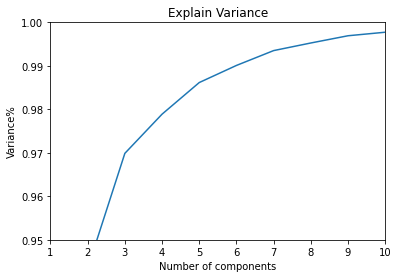

In [50]:
from sklearn.decomposition import PCA

pca=PCA()
principalComponents= pca.fit_transform(x_)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance%')
plt.title('Explain Variance')
plt.xlim([1,10])
plt.ylim([0.95,1])
plt.show()

In [51]:
pca=PCA(n_components = 8)
new_data=pca.fit_transform(df_f)


In [52]:
principal_x=pd.DataFrame(new_data,columns=[f"column{i}" for i in range(8)])

In [53]:
principal_x=principal_x.to_numpy()


In [54]:
principal_x
type(principal_x)

numpy.ndarray

In [55]:
y=[[0,0,0,0,1] for i in range(0,56)]
len(y)
for j in range(56,74):
    y.append([0,0,0,0,1])
for k in range(74,91):
    y.append([1,0,0,0,0])
for l in range(91,102):
    y.append([1,0,0,0,1])
for l in range(102,127):
    y.append([0,1,0,0,0])
for l in range(127,159):
    y.append([0,0,1,0,0])
for l in range(159,192):
    y.append([0,0,0,1,0])
for l in range(192,197):
    y.append([1,0,1,0,0])
for l in range(197,207):
    y.append([1,1,1,0,1])
for l in range(207,210):
    y.append([0,1,1,0,1])
for l in range(210,214):
    y.append([1,1,0,0,1])
for l in range(214,218):
    y.append([1,0,0,0,1])
for l in range(218,226):
    y.append([1,1,0,0,1])
Y=y
len(Y)
Y=np.asarray(Y)
 

In [56]:
principal_x

array([[ 2.85219399e+00, -1.36838598e-01, -1.93114123e-01, ...,
        -9.36866319e-03,  5.25942394e-02,  7.99250171e-02],
       [ 2.75215897e+00, -1.24315552e-01, -1.74183893e-01, ...,
         7.03469953e-04,  4.36271085e-02,  7.35276266e-02],
       [ 2.50992895e+00, -9.98693474e-02, -1.49439140e-01, ...,
         6.12201906e-03,  3.98096167e-02,  7.19002087e-02],
       ...,
       [-1.83855091e-01, -1.68995505e-02, -1.25897257e-02, ...,
        -5.35793034e-05, -1.66600998e-03,  1.19751960e-03],
       [-1.82890648e-01, -1.68304634e-02, -1.25918684e-02, ...,
        -4.31073207e-04, -1.71143698e-03,  9.32287924e-04],
       [-1.84364339e-01, -1.75928086e-02, -1.25007968e-02, ...,
        -2.84738006e-04, -1.94692148e-03,  6.03939548e-04]])

In [57]:
principal_x.shape

(1225, 8)

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay


In [59]:
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(principal_x[:226], Y[:226], test_size=0.50, random_state=42)
print(x_train_svm.shape)
print(x_test_svm.shape)
svm = SVC(kernel="rbf",random_state=42)
multilabel_classifier = MultiOutputClassifier(svm, n_jobs=-1)
multilabel_classifier = multilabel_classifier.fit(x_train_svm, y_train_svm)
y_test_pred = multilabel_classifier.predict(x_test_svm)
matrices_svm = multilabel_confusion_matrix(y_test_svm, y_test_pred)
print(metrics.classification_report(y_test_svm,y_test_pred))
multilabel_classifier.score(x_test_svm,y_test_svm)

(113, 8)
(113, 8)
              precision    recall  f1-score   support

           0       0.92      0.38      0.54        29
           1       0.00      0.00      0.00        25
           2       0.77      0.68      0.72        25
           3       1.00      0.44      0.61        16
           4       0.88      0.87      0.88        53

   micro avg       0.87      0.55      0.67       148
   macro avg       0.71      0.47      0.55       148
weighted avg       0.74      0.55      0.61       148
 samples avg       0.67      0.61      0.62       148



c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.49557522123893805

In [ ]:
# from sklearn.model_selection import KFold
# kf=KFold(n_splits=15)
# kf.get_n_splits(principal_x)

In [ ]:
# def get_score(model,X_train,X_test,y_train,y_test):
#     model.fit(X_train,y_train)
#     return model.score(X_test,y_test)

In [ ]:
# from sklearn.model_selection import StratifiedKFold
# folds=StratifiedKFold(n_splits=3)


In [ ]:
#scores_k=[]
# scores_s=[]
# scores_rf=[]
# for train_index, test_index in kf.split(principal_x):
#     X_train_kf,X_test_kf,y_train_kf,y_test_kf=principal_x[train_index],principal_x[test_index],Y[train_index],Y[test_index]
#     scores_k.append(get_score(MLkNN(k=2,s=0.5),X_train_kf,X_test_kf,y_train_kf,y_test_kf))
#     scores_s.append(get_score(MultiOutputClassifier(LinearSVC(random_state=42), n_jobs=-1),X_train_kf,X_test_kf,y_train_kf,y_test_kf))
#     scores_rf.append(get_score(RandomForestClassifier(max_depth=2, random_state=0),X_train_kf,X_test_kf,y_train_kf,y_test_kf))

In [ ]:
# print(np.average(scores_k))

# print(np.average(scores_s))
# print(np.average(scores_rf))

In [61]:
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(principal_x[:226],Y[:226],test_size=0.10,random_state=17)

In [62]:
from sklearn.model_selection import GridSearchCV
parameters = {'k': range(1,10), 's': [0.5, 0.7, 1.0]}
score = 'f1_macro'
clf = GridSearchCV(MLkNN(), parameters, scoring=score)
clf.fit(x_train_svm, y_train_svm)
print (clf.best_params_, clf.best_score_)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\admin\appdata\local\programs\pytho

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\admin\appdata\local\programs\pytho

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\admin\appdata\local\programs\pytho

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\admin\appdata\local\programs\pytho

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\admin\appdata\local\programs\pytho

{'k': 1, 's': 0.5} 0.7785809157026549


c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [63]:
classifier = MLkNN(k=1,s=0.5)

# train
#classifier.fit(x_train_svm, y_train_svm)
classifier.fit(principal_x[:226], Y[:226])
# predict
predictions = classifier.predict(x_test_svm)


c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [64]:
from sklearn import metrics
y_expect=y_test_svm
y_pred=predictions
#print(metrics.classification_report(y_expect,y_pred))
#classifier.score(x_test_svm,y_test_svm)

In [65]:
print(classifier.predict(principal_x[300:600]).todense())
print(Y[220:229])

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]
[[1 1 0 0 1]
 [1 1 0 0 1]
 [1 1 0 0 1]
 [1 1 0 0 1]
 [1 1 0 0 1]
 [1 1 0 0 1]]
